In [1]:
# import dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import time
import math
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
!pip install seaborn

In [3]:
# import files and upload them as dataframe
earthquakes = pd.read_csv("Resources/earthquakes.csv", encoding = "ISO-8859-1")

In [4]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
#Keep selected columns
earthquakes_1 = earthquakes[['Date','Time','Latitude','Longitude','Type','Depth','Magnitude','ID']]
earthquakes_1.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890


In [6]:
earthquakes_1.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
Type          object
Depth        float64
Magnitude    float64
ID            object
dtype: object

In [7]:
earthquakes_1.Date=pd.to_datetime(earthquakes_1.Date, utc=True)
earthquakes_1.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890


In [8]:
earthquakes_1.dtypes

Date         datetime64[ns, UTC]
Time                      object
Latitude                 float64
Longitude                float64
Type                      object
Depth                    float64
Magnitude                float64
ID                        object
dtype: object

In [9]:
# Save to CSV
#earthquakes_1.to_csv("earthquakesclean.csv", index = False)

In [10]:
earthquakes_1['year'] =earthquakes_1['Date'].dt.year
earthquakes_1.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,year
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,1965
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,1965
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,1965
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,1965
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,1965


In [11]:
# group by the created columns
grouped_df = earthquakes_1.groupby('year').size().reset_index(name='frequency')
#grouped_df = earthquakes_1.groupby('year').agg(len)
grouped_df.head()

,year,frequency
0,1965,339
1,1966,234
2,1967,255
3,1968,305
4,1969,323


In [12]:
grouped_df.dtypes

year         int64
frequency    int64
dtype: object

In [13]:
a=lambda x: str(x).split(',')
grouped_df['frequency'].apply(a)

0     [339]
1     [234]
2     [255]
3     [305]
4     [323]
5     [345]
6     [386]
7     [388]
8     [401]
9     [361]
10    [412]
11    [457]
12    [425]
13    [410]
14    [356]
15    [348]
16    [321]
17    [346]
18    [453]
19    [482]
20    [476]
21    [485]
22    [505]
23    [489]
24    [480]
25    [528]
26    [429]
27    [533]
28    [466]
29    [508]
30    [591]
31    [541]
32    [456]
33    [388]
34    [446]
35    [553]
36    [443]
37    [444]
38    [485]
39    [571]
40    [533]
41    [508]
42    [608]
43    [508]
44    [517]
45    [560]
46    [713]
47    [445]
48    [461]
49    [480]
50    [446]
51    [469]
Name: frequency, dtype: object

In [14]:
grouped_df.dtypes

year         int64
frequency    int64
dtype: object

In [15]:
grouped_df.head()

,year,frequency
0,1965,339
1,1966,234
2,1967,255
3,1968,305
4,1969,323


In [16]:
grouped_df.dtypes

year         int64
frequency    int64
dtype: object

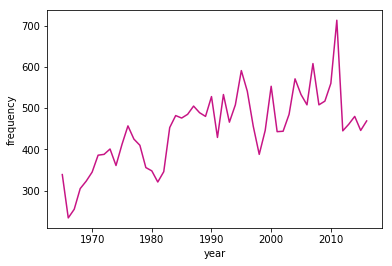

In [17]:
from matplotlib.colors import LogNorm
ax = sns.lineplot(x="year", y="frequency",
                   hue_norm=LogNorm(), data=grouped_df, color='mediumvioletred')

In [18]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [19]:
# 1,1,2 ARIMA Model
model = ARIMA(grouped_df.frequency, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.frequency   No. Observations:                   51
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -281.850
Method:                       css-mle   S.D. of innovations             58.968
Date:                Sat, 16 Nov 2019   AIC                            573.700
Time:                        10:48:02   BIC                            583.359
Sample:                             1   HQIC                           577.391
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.1313      0.895      4.617      0.000       2.377       5.885
ar.L1.D.frequency     0.3767      0.393      0.960      0.342      -0.393       1.146
ma.L1.D.frequency    -0.

In [20]:
model = ARIMA(grouped_df.frequency, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.frequency   No. Observations:                   51
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -281.859
Method:                       css-mle   S.D. of innovations             59.009
Date:                Sat, 16 Nov 2019   AIC                            571.718
Time:                        10:48:02   BIC                            579.445
Sample:                             1   HQIC                           574.671
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.1235      0.914      4.512      0.000       2.332       5.915
ar.L1.D.frequency     0.4264      0.133      3.218      0.002       0.167       0.686
ma.L1.D.frequency    -0.

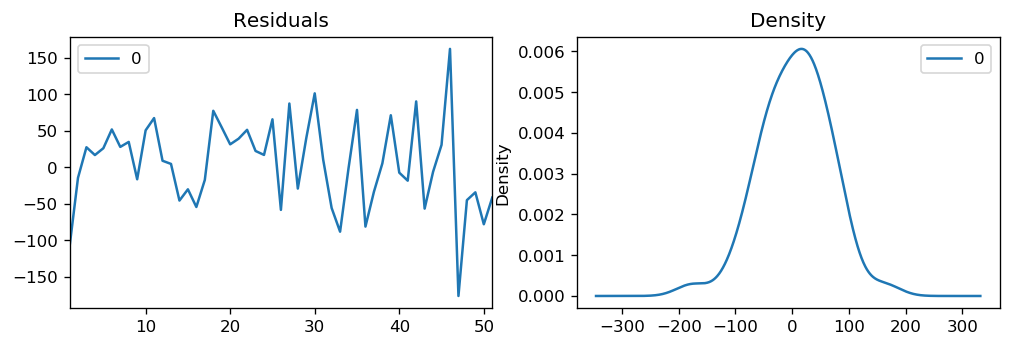

In [21]:
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

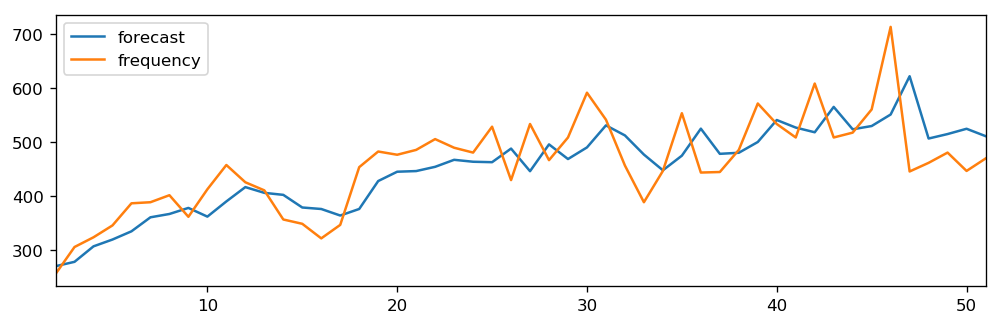

In [22]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)

plt.show()

In [23]:
grouped_df.head()

,year,frequency
0,1965,339
1,1966,234
2,1967,255
3,1968,305
4,1969,323


In [24]:
grouped_df.dtypes

year         int64
frequency    int64
dtype: object

In [25]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = grouped_df.frequency[:39]
test = grouped_df.frequency[39:]

In [26]:
test.index

RangeIndex(start=39, stop=52, step=1)

In [27]:
train.index

RangeIndex(start=0, stop=39, step=1)

In [35]:
# Build Model
model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(13, alpha=0.05)

In [37]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
#fc_series.apply(lambda col: col.drop_duplicates().reset_index(drop=True))


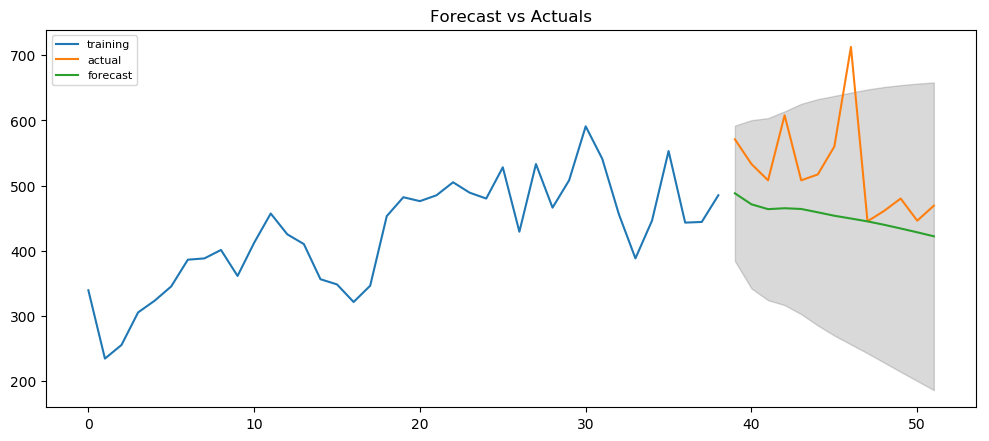

In [38]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()